# A gentle introduction to Python data visualization for R folks

In this lesson you will learn how to create data visualizations to explore trends in a data set. You'll learn the basic types of graphs and which data types they are appropriate for and how to build a graph.In this lesson you will learn how to create data visualizations to explore trends in a data set. You'll learn the basic types of graphs and which data types they are appropriate for and how to build a graph.

We will start with learning the "grammar of graphics." Just like grammar in learning a language allows you to construct your own sentences, the grammar of graphics gives you a framework for building and customizing graphs, enabling you to generate your own graphs. 

The grammar of graphics is supported in python by the `plotnine` package. It is worth noting that there are many other ways to do data visualization in python. This lesson will focus on developing chats based on the unifying framework that is present with the grammar of graphics in `plotnine`.We will start with learning the "grammar of graphics." Just like grammar in learning a language allows you to construct your own sentences, the grammar of graphics gives you a framework for building and customizing graphs, enabling you to generate your own graphs. 

The grammar of graphics is supported in python by the `plotnine` package. It is worth noting that there are many other ways to do data visualization in python. This lesson will focus on developing chats based on the unifying framework that is present with the grammar of graphics in `plotnine`.

This lesson was originally authored in R and RMarkdown by Jenna C. Carlson, PhD. It has been adapted to Python and Jupyter by Matt Burton.

## Learning Objectives

-   Create various graphical summaries of data  
-   Describe the “grammar” of ggplot2-style functions with [plotnine](https://plotnine.readthedocs.io/en/latest/index.html#)
-   Build custom visualizations with plotnine




## Loading Libraries

This lesson uses the [plotnine](https://plotnine.readthedocs.io/en/latest/index.html) Python library to provide a "ggplot2-like" experience allowing R users to easily transition to Python data visualization. Plotnine is an interface to the [matplotlib](https://matplotlib.org/) data visualization library, so expect to look up the matplotlib documentation for various settings.

In [ ]:
# load pandas for the data
import pandas as pd

# load plotnine for ggploty plotting
from plotnine import *
# import necessary to 
import matplotlib.font_manager

## Datasets used in this lesson

- [City of Pittsburgh Trees](https://data.wprdc.org/dataset/city-trees) - This dataset contains information about trees cared for and managed by the City of Pittsburgh Department of Public Works Forestry Division. Each row represents a tree with with information about the type, location, size, and various measures about economic and environmental benefits. The dataset contains 45,709 entries.
    - The dataset is stored as a CSV file with the name `pgh-trees.csv`- [City of Pittsburgh Trees](https://data.wprdc.org/dataset/city-trees) - This dataset contains information about trees cared for and managed by the City of Pittsburgh Department of Public Works Forestry Division. Each row represents a tree with with information about the type, location, size, and various measures about economic and environmental benefits. The dataset contains 45,709 entries.
    - The dataset is stored as a CSV file in the `datasets` directory with the name `pgh-trees.csv`

In [ ]:
# load the cleaner version of the trees dataset
trees = pd.read_csv("datasets/pgh_trees_cleaner.csv")

## Creating a plot

All visualizations made with `plotnine` have the same inherent structure. There is the `ggplot()` function which defines, at a minimum, which data set will be used to make the plot. Then you add a geom function on to that base plot definition.

```python
(ggplot(data = <DATA>) +
    <GEOM_FUNCTION>(mapping = aes(<MAPPINGS>)))
```

The `ggplot` function by itself doesn't produce a plot. It creates a shell plot based on the information you give it.

In [ ]:
# run the ggplot function with the tree dataset
ggplot(data = trees)

This creates a completely empty plot because we haven't added any *geoms* to our plot. We could set up this "shell" plot a little bit more by telling it which variables we will use in the aesthetics mapping (more on that below). For example, if we want to make a plot using the variable height and width, the `ggplot` function would look like this:

In [ ]:
# bind data to the plot
ggplot(data = trees, mapping = aes(x='width', y='height'))

Notice how there still isn't actually any data plotted, but the X and Y axes are set up with the variable names and their ranges. We can check this by examining the variables themselves.

In [ ]:
# compute summary statistics for the width and height columns
trees[["width","height"]].describe()

The min and max values of each variable are what the ggplot function used to define the range of the X and Y axis.

Next, you can add a geom to plot the data. Let's start with a simple scatter plot, which is created by `geom_point`. Literally, we will plot the data as points added on top of this shell plot.

In [ ]:
# add point geometry to our plot
(ggplot(data = trees, mapping = aes(x="width", y="height")) + 
  geom_point())


### Plotnine in Python vs. ggplot 2 in R

A quick note about coding style here. Python statements need to be all on one line. But often with ggplot we will add lots of different function together to create one plot. It is recommend you put each additional function on its own line for readability. In Python, if we want to add together each function call on a separate line we need to wrap the entire statement in parentheses `()` and then put a `+` when we add a plotnine function to our base plot object (created by the `ggplot()` call at the beginning. By wrapping the expression in parentheses Python will ignore the newlines and act as if everything was written in one line, that is, ignore the newlines and white space. 

For example, this single line of code works the exact way as the one above, but it is clearer to read above. (And you can imagine if we add 10 more functions, having them on each line will be much clearer to read.) While it looks weird, it allows the code to follow the code style of ggplot2 code written in R.

In [ ]:
# ggplot function calls on one line
ggplot(data = trees, mapping = aes(x="width", y="height")) + geom_point()

Just don't forget the `+` goes at the end of the line to string together the functions. Here are some common mistakes people make when learning to build ggplots.

In [ ]:
# run me to get a syntax error
ggplot(data = trees, mapping = aes(x=width, y=height)) geom_point()

#### Task - Stem summary statistics

1. Find the min/max of the variable stem and height in the `trees` dataset.  

In [ ]:
# your code here


#### Answer - 

Click on the ellipses (...) below to see the answers.

In [ ]:
# solution

# select stems and height cols and use the describe() for summary statistics
trees[["stems", "height"]].describe() 

# expect the x-axis to go from 0-158 and y-axis from 0-211

#### Task - Stem shell

1. Use the ggplot function to create a "shell" plot for a graph that will have `height` on the X-axis and `stems` on the Y-axis. Looking at range of the axes, does it match your expectations from above?

In [ ]:
# write your code here


#### Answer - 

Click on the ellipses (...) below to see the answers.

In [ ]:
# solutions
ggplot(data = trees, mapping = aes(x="height", y="stems"))

#### Task - Get to the points

1.  Adapt the code you wrote above to add the geom `geom_point()` function to make a scatter plot of height and stems.

In [ ]:
# write your code here


#### Answer - 

Click on the ellipses (...) below to see the answers.

In [ ]:
# answer

# add points to the plot. don't forget to wrap in parens and use + to add functions
(ggplot(data = trees, mapping = aes(x="height", y="stems")) +
    geom_point())

## Adding features with functions

The code cell below generates a stylized plot from the `trees` dataset. 


In [ ]:
# ggplot with several added functions
(ggplot(data = trees, mapping = aes(x="height", y="overall_benefits_dollar_value")) +
  geom_point(color="lightblue") + 
  theme_classic() + 
  xlab("Height of tree") + 
  ylab("Overall Benefits ($)"))

#### Task - Features of the figure

1.  Identify the lines of code code that:
    1.  Add blue points
    2.  Bind or specify the dataset and specific columns to plot
    3.  Changes the axis labels 
2. Describe in your own words what is being plotted and any trends or insights the plot reveals.

Write your answer in the markdown cell below

*Your answer here*




#### Answer - 

Click on the ellipses (...) below to see the answers.

*answer*

1. Features of the plot
    1. Line 3 `geom_point(color="lightblue")` adds the point geometry function with a keyword argument `color` with the string "light blue" to specify the color of the points. 
    2. Line 2 `ggplot(data = trees, mapping = aes(x="height", y="overall_benefits_dollar_value"))` calls the ggplot function with the data and mapping arguments that pass the tree data and uses the `aes` function to specify what columns are on the x and y axes.
    3. Lines 5 and 6 use the `xlab` and `ylab` functions with the text labels as their arguments
2. This function creates a scatter plot of overall dollar value benefit by the height of the trees in Pittsburgh.This plots a scatter plot of overall dollar value benefit by the height of the trees in Pittsburgh. Generally taller trees have higher benefit values. There are also a lot of trees of height zero.

#### Task - From height to width

1.  Modify the code below to plot the width of the tree instead of the height of the tree. 
2. Do you observe a different relationship between the two variables?

In [ ]:
# modify this code
(ggplot(data = trees, mapping = aes(x="height", y="overall_benefits_dollar_value")) +
  geom_point(color="lightblue") + 
  theme_classic() + 
  xlab("Height of tree") + 
  ylab("Overall Benefits ($)"))

#### Answer - 

Click on the ellipses (...) below to see the answers.

In [ ]:
# solution
(ggplot(data = trees, mapping = aes(x="width", y="overall_benefits_dollar_value")) +
  geom_point(color="lightblue") + 
  theme_classic() + 
  xlab("Width of tree") + 
  ylab("Overall Benefits ($)"))

*answer*

2. The correlation between the width and value doesn't appear as strong as with the height, but there are still a lot of trees with zero values.

#### Trees - Green trees are green

1. Trees are green not blue! Modify the code below to change the color of the points to dark green. See the [matplotlib documentation](https://matplotlib.org/stable/gallery/color/named_colors.html#css-colors) for a list of color names.

In [ ]:
# modify this code
(ggplot(data = trees, mapping = aes(x="height", y="overall_benefits_dollar_value")) +
  geom_point(color="lightblue") + 
  theme_classic() + 
  xlab("Height of tree") + 
  ylab("Overall Benefits ($)"))

#### Answer - 

Click on the ellipses (...) below to see the answers.

In [ ]:
# solution
(ggplot(data = trees, mapping = aes(x="width", y="overall_benefits_dollar_value")) +
  geom_point(color="darkgreen") + 
  theme_classic() + 
  xlab("Width of tree") + 
  ylab("Overall Benefits ($)"))

#### Task - No more theme

1. Modify the code below to make the points dark green and remove classic theme.
2. What has changed in the aesthetics of the plot?

In [ ]:
# modify this code
(ggplot(data = trees, mapping = aes(x="height", y="overall_benefits_dollar_value")) +
  geom_point(color="lightblue") + 
  theme_classic() + 
  xlab("Height of tree") + 
  ylab("Overall Benefits ($)"))

#### Answer - 

Click on the ellipses (...) below to see the answers.

In [ ]:
# answer 1
(ggplot(data = trees, mapping = aes(x="width", y="overall_benefits_dollar_value")) +
  geom_point(color="darkgreen") + 
  xlab("Width of tree") + 
  ylab("Overall Benefits ($)"))

*answer* 

 2. The style of the plot has changed. It now has a gray background with grid lines.

## Aesthetic Mappings - Dimensions with Data

When you changed the color of the points in the plot above, you changed the *aesthetic* of the plot. (This is what ggplot calls things like color, etc.)

There are two primary ways to change the aesthetics of a ggplot - a constant way (like you did above, where the aesthetics of all the data are changed to the same thing) or a variable way (i.e., depending on values of a variable in the data set).

To create a variable, data-driven aesthetic mapping you need to enclose the aesthetic mapping in the `aes()` function. Look at the code cell below and answer the following tasks.

In [ ]:
# plot with a data to color mapping
(ggplot(data = trees, mapping = aes(x="height", y="overall_benefits_dollar_value")) +
  geom_point(aes(color="stems")) + 
  theme_classic() + 
  xlab("Height of tree") + 
  ylab("Overall Benefits ($)"))

#### Task - Features of the figure

Look at the code above and answer the following questions:
1. What variable in the trees data is controlling the color of the points?  
2. What is the range of this variable.
3. Modify the code below to color the points based on the variable `condition`. What is different about the coloring in this plot? How is this related to the values of the data in that column?

*your answers here*



In [ ]:
# modify this code
(ggplot(data = trees, mapping = aes(x="height", y="overall_benefits_dollar_value")) +
  geom_point(aes(color="stems")) + 
  theme_classic() + 
  xlab("Height of tree") + 
  ylab("Overall Benefits ($)"))

#### Answer - 

Click on the ellipses (...) below to see the answers.

*answer* 

1. The `stems` column is mapped to color for the geom_points
2. This variable has a range of 0 to 200
3. The coloring is not gradient anymore because we are coloring by a categorical variable.

In [ ]:
# answer 3
(ggplot(data = trees, mapping = aes(x="height", y="overall_benefits_dollar_value")) +
  geom_point(aes(color="condition")) + 
  theme_classic() + 
  xlab("Height of tree") + 
  ylab("Overall Benefits ($)"))

### Transparency

When lots of data are being plotted, it can sometimes be challenging to see everything. One common option is to change the transparency of the points to make it easier to see. This is done through the option `alpha=`.

In [ ]:
# plot with transparency
(ggplot(data = trees, mapping = aes(x="height", y="overall_benefits_dollar_value")) +
  geom_point(aes(color="stems"), alpha = 0.1) + 
  theme_classic() + 
  xlab("Height of tree") + 
  ylab("Overall Benefits ($)"))

#### Task - Features of a figure's transparency

1.  In the plot above is the alpha option being used as a variable aesthetic mapping or constant? How do you know?
2.  How might you change the behavior of the alpha option to be dynamic based on the value of the `stems` column? Modify the code to make the points transparent based on the stems.

In [ ]:
*your answer here*



In [ ]:
# you code here


#### Answer - 

Click on the ellipses (...) below to see the answers.

*answers*
1. The alpha is set to a constant value in the code of 0.1. If it were a variable aesthetic mapping it would appear in the legend.
2.  Put the `alpha=` keyword argument inside the `aes()` function with `stems` as the value.

In [ ]:
# answer

# plot with variable transparency based on stems
(ggplot(data = trees, mapping = aes(x="height", y="overall_benefits_dollar_value")) +
  geom_point(aes(color="stems", alpha="stems")) + 
  theme_classic() + 
  xlab("Height of tree") + 
  ylab("Overall Benefits ($)"))

### Size

The size of data points can be used in charts to represent additional dimensions of data values. The code below adds a size aesthetic mapping.

In [ ]:
# data to size mapping
(ggplot(data = trees, mapping = aes(x="height", y="overall_benefits_dollar_value")) +
  geom_point(aes(color="stems", size="stems")) + 
  theme_classic() + 
  xlab("Height of tree") + 
  ylab("Overall Benefits ($)"))

#### Task - Features of a figure's size

1. In the example plot above is the size option being used as a variable aesthetic or constant? How do you know?
2. Execute the code for the two plots below and compare the results. What kind of value is `size` being assigned? How is that value affecting the plot? Given your understanding of aesthetic mappings, how is ggplot treating the values for the `size` argument?

In [ ]:
# plot 1
(ggplot(data = trees, mapping = aes(x="height", y="overall_benefits_dollar_value")) +
  geom_point(aes(color="stems", size=1)) + 
  theme_classic() + 
  xlab("Height of tree") + 
  ylab("Overall Benefits ($)") + 
  ggtitle("Plot A"))

In [ ]:
# plot 2
(ggplot(data = trees, mapping = aes(x="height", y="overall_benefits_dollar_value")) +
  geom_point(aes(color="stems", size=5)) + 
  theme_classic() + 
  xlab("Height of tree") + 
  ylab("Overall Benefits ($)") + 
  ggtitle("Plot B"))

#### Answer - 

Click on the ellipses (...) below to see the answers.

*answer*

1. The size option is variable because it is inside the `aes` mapping function and appears in the legend.
2. Size is set to a constant value, however size is showing up in the legend and for both plots the points are the same size even though we asked for different sizes. R thinks I have given it a variable aes map.

#### Task - Adjust the size

1.  Modify the code below to make all the points have a size of 2. 

In [ ]:
# modify this code
(ggplot(data = trees, mapping = aes(x="height", y="overall_benefits_dollar_value")) +
  geom_point(aes(color="stems", size=4)) + 
  theme_classic() + 
  xlab("Height of tree") + 
  ylab("Overall Benefits ($)"))

#### Answer - 

Click on the ellipses (...) below to see the answers.

In [ ]:
# answer
(ggplot(data = trees, mapping = aes(x="height", y="overall_benefits_dollar_value")) +
  geom_point(aes(color="stems"), size=2) + 
  theme_classic() + 
  xlab("Height of tree") + 
  ylab("Overall Benefits ($)"))

### Shape

You can also add additional dimensions of data by adjusting the shape of the points based on the data values.

In [ ]:
# example plot with shape
(ggplot(data = trees, mapping = aes(x="height", y="overall_benefits_dollar_value")) +
  geom_point(aes(color="overhead_utilities", shape="overhead_utilities")) + 
  theme_classic() + 
  xlab("Height of tree") + 
  ylab("Overall Benefits ($)"))

#### Task - Change the shape

1. Review the [matplotlib marker documentation](https://matplotlib.org/stable/api/markers_api.htmlhttps://matplotlib.org/stable/api/markers_api.html) to see all the different shapes available. 
2.  Modify the code below to make all the points a constant of triangles pointing up.

In [ ]:
# modify this code
(ggplot(data = trees, mapping = aes(x="height", y="overall_benefits_dollar_value")) +
  geom_point(aes(color="overhead_utilities", shape="overhead_utilities")) + 
  theme_classic() + 
  xlab("Height of tree") + 
  ylab("Overall Benefits ($)"))

#### Answer - 

Click on the ellipses (...) below to see the answers.

In [ ]:
# answer
(ggplot(data = trees, mapping = aes(x="height", y="overall_benefits_dollar_value")) +
  geom_point(aes(color="overhead_utilities"), shape = "^") + 
  theme_classic() + 
  xlab("Height of tree") + 
  ylab("Overall Benefits ($)"))

#### Task - Shape based on a different column

1.  Modify the original code to make the color and shape depend on the `condition` column.

In [ ]:
# modify this code
(ggplot(data = trees, mapping = aes(x="height", y="overall_benefits_dollar_value")) +
  geom_point(aes(color="overhead_utilities", shape="overhead_utilities")) + 
  theme_classic() + 
  xlab("Height of tree") + 
  ylab("Overall Benefits ($)"))

#### Answer - 

Click on the ellipses (...) below to see the answers.

In [ ]:
# solutions
(ggplot(data = trees, mapping = aes(x="height", y="overall_benefits_dollar_value")) +
  geom_point(aes(color="condition", shape = "condition")) + 
  theme_classic() + 
  xlab("Height of tree") + 
  ylab("Overall Benefits ($)"))

## Fancy Formatting Plots

The plot below uses some advanced formatting techniques as well as additional geometry functions to produce an information packed plot.

In [ ]:
# make a fancy plot with some math
(ggplot(data = trees[trees["neighborhood"].str.contains("Oakland", na=False)], 
       mapping = aes(x="width", y="energy_benefits_electricity_dollar_value", color=("stems>1"))) +
  geom_point() + 
  geom_smooth(method="lm") + 
  xlim(0.01,40) + 
  theme_bw() + 
  scale_color_manual(name = "Stems", labels = ["0-1", "2+"], values = ["darkblue", "red"]) + 
  xlab("Width of tree") + 
  ylab("Electricity Energy Benefit ($)"))

#### Task - Features of the figure

Look at the code that generated the plot above and identify

1. The code that creates a subset of the data. What does that code do?
2. The code that makes the color of the points different based upon the number of stems.
3. The code that specifies the range of the x-axis.

*your answer here*



#### Answer - 

Click on the ellipses (...) below to see the answers.

*answer*

1. The DataFrame being passed to the `ggplot` function selects rows where the neighborhood name contains the string "Oakland". Furthermore, the missings values are consider false (and thus dropped by the mask)
    `trees[trees["neighborhood"].str.contains("Oakland", na=False)]`
2. The default aesthetic mapping for the plot, which is specificed in the `mapping` parameter for the `ggplot` function, has the argument `color=("stems>1")`. This separates the color of all plot elements based upon if the number of stems is greater than 1.
3. The function `xlim(0.01,40)` added in line 6 specifies the range of the x-axis.

#### Task - Change the color scale

1. Comment out the line that begins with `scale_color_manual` and execute the code. What do you notice is different?

In [ ]:
# modify this code
(ggplot(data = trees[trees["neighborhood"].str.contains("Oakland", na=False)], 
       mapping = aes(x="width", y="energy_benefits_electricity_dollar_value", color=("stems>1"))) +
  geom_point() + 
  geom_smooth(method="lm") + 
  xlim(0.01,40) + 
  theme_bw() + 
  scale_color_manual(name = "Stems", labels = ["0-1", "2+"], values = ["darkblue", "darkred"]) + 
  xlab("Width of tree") + 
  ylab("Electricity Energy Benefit ($)"))

#### Answer - 

Click on the ellipses (...) below to see the answers.

In [ ]:
# answer
(ggplot(data = trees[trees["neighborhood"].str.contains("Oakland", na=False)], 
       mapping = aes(x="width", y="energy_benefits_electricity_dollar_value", color=("stems>1"))) +
  geom_point() + 
  geom_smooth(method="lm") + 
  xlim(0.01,40) + 
  theme_bw() + 
  #scale_color_manual(name = "Stems", labels = ["0-1", "2+"], values = ["darkblue", "darkred"]) + 
  xlab("Width of tree") + 
  ylab("Electricity Energy Benefit ($)"))

*answer*

The colors of the points/lines are different and the labeling on the legend is different.

#### Task - What has been added

1. Compare this plot to the plot at the beginning of the previous section. What aspects are the same and what has been added?

*your answer here* 



#### Answer - 

Click on the ellipses (...) below to see the answers.

*answer*

It is still a scatter plot with two continuous variables, but now there are two trend lines and the points are colored by 2 categories of the number of stems.

#### Task - Changing labels

1.  Modify the code below to change the labels of stems in the legend to “few” instead of “0-1” and “many” instead of “2+”.

In [ ]:
# modify this code
(ggplot(data = trees[trees["neighborhood"].str.contains("Oakland", na=False)], 
       mapping = aes(x="width", y="energy_benefits_electricity_dollar_value", color=("stems>1"))) +
  geom_point() + 
  geom_smooth(method="lm") + 
  xlim(0.01,40) + 
  theme_bw() + 
  scale_color_manual(name = "Stems", labels = ["0-1", "2+"], values = ["darkblue", "darkred"]) + 
  xlab("Width of tree") + 
  ylab("Electricity Energy Benefit ($)"))

#### Answer - 

Click on the ellipses (...) below to see the answers.

In [ ]:
# solution
(ggplot(data = trees[trees["neighborhood"].str.contains("Oakland", na=False)], 
       mapping = aes(x="width", y="energy_benefits_electricity_dollar_value", color=("stems>1"))) +
  geom_point() + 
  geom_smooth(method="lm") + 
  xlim(0.01,40) + 
  theme_bw() + 
  scale_color_manual(name = "Stems", labels = ["few", "many"], values = ["darkblue", "darkred"]) + 
  xlab("Width of tree") + 
  ylab("Electricity Energy Benefit ($)"))

#### Task - Changing the x-axis range

1.  Modify the code below to change the x-axis range to 0-40. What is
    different?

In [ ]:
# modify this code
(ggplot(data = trees[trees["neighborhood"].str.contains("Oakland", na=False)], 
       mapping = aes(x="width", y="energy_benefits_electricity_dollar_value", color=("stems>1"))) +
  geom_point() + 
  geom_smooth(method="lm") + 
  xlim(0.01,40) + 
  theme_bw() + 
  scale_color_manual(name = "Stems", labels = ["0-1", "2+"], values = ["darkblue", "darkred"]) + 
  xlab("Width of tree") + 
  ylab("Electricity Energy Benefit ($)"))

#### Answer - 

Click on the ellipses (...) below to see the answers.

In [ ]:
# solution
(ggplot(data = trees[trees["neighborhood"].str.contains("Oakland", na=False)], 
       mapping = aes(x="width", y="energy_benefits_electricity_dollar_value", color=("stems>1"))) +
  geom_point() + 
  geom_smooth(method="lm") + 
  xlim(0,40) + 
  theme_bw() + 
  scale_color_manual(name = "Stems", labels = ["0-1", "2+"], values = ["darkblue", "darkred"]) + 
  xlab("Width of tree") + 
  ylab("Electricity Energy Benefit ($)"))

*answer*

There are a bunch of points with width = 0 added to the plot, and the trend lines have changed slope.

## Conditional Formatting

What we did in the last section by coloring the points and trend lines based on whether the variable `stems` was 2 or more is an example of **conditional formatting**. You may be familiar with this concept in Excel where you can color cells based on their values; it is a similar thing in ggplot2. Conditional formatting can be applied to many different aesthetics: color, shape, fill, alpha, etc. It is a useful tool to make informative visualization "on the fly" without creating new variables in your data set.

As you noticed in the questions above, the legend that appears by default along with the conditional formatting is not the prettiest. When using conditional formatting, it is common to change the appearance using the `scale_*_manual` set of functions (replacing `*` for the name of the aesthetic you used conditional formatting on, e.g. color).

#### Task - Format using conditions

1. Modify the code below to perform conditional formatting, instead changing the shape of the points based on whether the tree has 2+ stems. Make the points for trees with 0-1 stems be circles and the points for trees with 2+ stems triangles. See the [marker documentation](https://matplotlib.org/stable/api/markers_api.html) for reference.

In [ ]:
# modify this code
(ggplot(data = trees[trees["neighborhood"].str.contains("Oakland", na=False)], 
       mapping = aes(x="width", y="energy_benefits_electricity_dollar_value", color=("stems>1"))) +
  geom_point() + 
  xlim(0.01,40) + 
  theme_bw() + 
  scale_color_manual(name = "Stems", labels = ["0-1", "2+"], values = ["darkblue", "darkred"]) + 
  xlab("Width of tree") + 
  ylab("Electricity Energy Benefit ($)"))

#### Answer - 

Click on the ellipses (...) below to see the answers.

In [ ]:
# Solution
(ggplot(data = trees[trees["neighborhood"].str.contains("Oakland", na=False)], 
       mapping = aes(x="width", y="energy_benefits_electricity_dollar_value", shape=("stems>1"))) +
  geom_point() + 
  xlim(0.01,40) + 
  theme_bw() + 
  scale_shape_manual(name = "Stems", labels = ["0-1", "2+"], values = [".","^"]) + 
  xlab("Width of tree") + 
  ylab("Electricity Energy Benefit ($)"))

## Order matters

The code below creates a "violin plot", which shows the density of values through a kernel value probability distribution.

In [ ]:
(ggplot(data = trees.query('land_use == "Park" and condition.notna()'),
        mapping = aes(x="condition",
                     y="overall_benefits_dollar_value")) +
  geom_violin(aes(fill="condition")) + 
  geom_point(position = position_jitter(width = 0.1, random_state=1), alpha = 0.25) +
  theme_classic() +
  theme(legend_position = "none") + 
  ggtitle("Trees in Parks"))

#### Task - Features of the figure

Identify in the source code which lines:
1.  That specify the color of the densities 
2.  That add points on top of the densities  
3.  That prevents the printing of the legend

*your answer here*


#### Answer - 

Click on the ellipses (...) below to see the answers.

*answer*

1.  control the color of the densities `fill=condition`  
2.  adds the points on top of the densities `geom_point(...)`  
3.  supresses the printing of the legend
        `theme(legend.position = "none")`

#### Task - What are we looking at?

1.  Describe what is being plotted in the figure above.

*your answer here*


#### Answer - 

Click on the ellipses (...) below to see the answers.

*answer*

The overall benefits of the tree are plotted by the tree's condition for trees in parks.

#### Task - Changing violin aesthetics

1.  Modify the code to change the aesthetic mapping in `geom_violin` to
    color. What happens?

In [ ]:
# modify this code
(ggplot(data = trees.query('land_use == "Park" and condition.notna()'),
       mapping = aes(x="condition",
                    y="overall_benefits_dollar_value")) +
  geom_violin(aes(fill="condition")) + 
  geom_point(position = position_jitter(random_state = 1, width = 0.1), alpha = 0.25) +
  theme_classic() +
  theme(legend_position = "none") + 
  ggtitle("Trees in Parks"))

#### Answer - 

Click on the ellipses (...) below to see the answers.

In [ ]:
# answer
(ggplot(data = trees.query('land_use == "Park" and condition.notna()'),
       mapping = aes(x="condition",
                    y="overall_benefits_dollar_value")) +
  geom_violin(aes(color="condition")) + 
  geom_point(position = position_jitter(random_state = 1, width = 0.1), alpha = 0.25) +
  theme_classic() +
  theme(legend_position = "none") + 
  ggtitle("Trees in Parks"))

*answer*

Only the outline is changed. (Color controls outline, fill controls
shading)

#### Task - Change the order of the geoms

1.  Modify the code to swap the order of the geoms. What happens?

In [ ]:
# modify this code
(ggplot(data = trees.query('land_use == "Park" and condition.notna()'),
       mapping = aes(x="condition",
                    y="overall_benefits_dollar_value")) +
  geom_violin(aes(fill="condition")) + 
  geom_point(position = position_jitter(random_state = 1, width = 0.1), alpha = 0.25) +
  theme_classic() +
  theme(legend_position = "none") + 
  ggtitle("Trees in Parks"))

#### Answer - 

Click on the ellipses (...) below to see the answers.

In [ ]:
# solution
(ggplot(data = trees.query('land_use == "Park" and condition.notna()'),
       mapping = aes(x="condition",
                    y="overall_benefits_dollar_value")) +
  geom_point(position = position_jitter(random_state = 1, width = 0.1), alpha = 0.25) +
  geom_violin(aes(fill="condition")) + 
  theme_classic() +
  theme(legend_position = "none") + 
  ggtitle("Trees in Parks"))

*answer*

You can't see the points anymore because the density is plotted on top of them. The order in which the geom functions are added matters.


## Geometric Objects 

You can stack geometic objects, or geoms, by adding them one top of one another (as we did in the previous sections with `geom_point() + geom_smooth()` and with `geom_violin()` and `geom_point()`.

Here are some examples of commonly used geoms for adding multiple dimensions of data to your plots.

### One variable

The plot below uses the `geom_bar` to create a bar chart of the `condition` data values.

In [ ]:
# create a bar chart of the counts of values in the condition column
(ggplot(data = trees, mapping = aes(x="condition")) +
  geom_bar())

In [ ]:
# create a historgram with 30 bins of the overall_benefits_dollar_value column
(ggplot(data = trees, mapping = aes(x="overall_benefits_dollar_value")) +
  geom_histogram(bins=30))

### Two variables

Some geoms, like `geom_bin3d`, need two dimensions of data to generate a plot.

In [ ]:
# create a 2-demensional histogram
(ggplot(data = trees, mapping = aes(x="overall_benefits_dollar_value", 
                                    y="property_value_benefits_dollarvalue")) +
 geom_bin2d())

In [ ]:
# create a box plots of property value benefits for each of the land_use values in the North Oakland neighborhood
(ggplot(data = trees.query('neighborhood == "North Oakland"'), 
       mapping = aes(x="land_use", y="property_value_benefits_dollarvalue")) +
  geom_boxplot() + 
  theme(axis_text_x = element_text(angle = 45, hjust = 1)))

In [ ]:
# plot the count of tree condition by council distrct
(ggplot(data = trees, mapping = aes(x="council_district", y="condition")) +
 geom_count())

#### Task - Experimenting with plots

Open the data visualization with [ggplot2 cheat sheet](https://raw.githubusercontent.com/rstudio/cheatsheets/main/data-visualization.pdfhttps://raw.githubusercontent.com/rstudio/cheatsheets/main/data-visualization.pdf)

1.  Find the geoms used above on the cheat sheet. Copy and modify the code for each plot by experimenting and playing with the options available based on the cheat sheet.

In [ ]:
# your code here


## Histograms and Density Plots

The code below creates a plot with two layers, a histogram and a density line.

In [ ]:
(ggplot(data = trees, mapping = aes(x = "stormwater_benefits_dollar_value")) + 
  geom_histogram(aes(y = "stat(density)"), binwidth = 1) + 
  geom_density(color = "red") + 
  ggtitle("Distribution of stormwater benefits ($)"))

#### Task - Features of the Figure

1.  Identify in the source code which lines…
    1.  Create the density plot line 
    2.  Adds the title to the figure
    3.  Defines the data set and variable to plot
    4.  Create the histogram
        
2.  Describe in your own words what is being plotted.

*your answer here*


#### Answer - 

Click on the ellipses (...) below to see the answers.

*answer*

1. Parts of the figure
    1. The function `geom_density(color = "red")` adds the density line  
    2. The function `ggtitle("Distribution of stormwater benefits ($)")` adds the title
    3. The function `ggplot(data = trees, mapping = aes(x = stormwater_benefits_dollar_value))` binds the tree data and specifies the column
    4. The function `geom_histogram(aes(y = stat(density)), binwidth = 1)` creates the histogram and specifies a density calculation instead of counts
2. This plots a histogram with a density overlay of the storm water benefit (in dollars) for trees in Pittsburgh. The y-axis is density instead of count.


#### Task - From water to carbon dioxide

1.  Modify the code below to plot the CO2 benefits in dollars instead of
    the storm water benefits. Write and execute the code below. What do
    you notice about the plot?

In [ ]:
# modify this code
(ggplot(data = trees, mapping = aes(x = "stormwater_benefits_dollar_value")) + 
  geom_histogram(aes(y = "stat(density)"), binwidth = 1) + 
  geom_density(color = "red") + 
  ggtitle("Distribution of stormwater benefits ($)"))

#### Answer - 

Click on the ellipses (...) below to see the answers.

In [ ]:
# answer
(ggplot(data = trees, mapping = aes(x = "co2_benefits_dollar_value")) + 
  geom_histogram(aes(y = "stat(density)"), binwidth = 1) + 
  geom_density(color = "red") + 
  ggtitle("Distribution of carbon dioxide benefits ($)"))

*answer*

The granularity of the bins is too course.

#### Task - Better bin width

1.  Modify the code below to change the bin width to 0.25. 

In [ ]:
# modify this code
(ggplot(data = trees, mapping = aes(x = "stormwater_benefits_dollar_value")) + 
  geom_histogram(aes(y = "stat(density)"), binwidth = 1) + 
  geom_density(color = "red") + 
  ggtitle("Distribution of stormwater benefits ($)"))

#### Answer - 

Click on the ellipses (...) below to see the answers.

In [ ]:
# solutions
(ggplot(data = trees, mapping = aes(x = "co2_benefits_dollar_value")) + 
  geom_histogram(aes(y = "stat(density)"), binwidth = 0.25) + 
  geom_density(color = "red") + 
  ggtitle("Distribution of carbon dioxide benefits ($)"))

#### Task - No bins

1.  Modify the code below to remove the bin width option entirely. What
    is the result?

In [ ]:
# modify this code
(ggplot(data = trees, mapping = aes(x = "stormwater_benefits_dollar_value")) + 
  geom_histogram(aes(y = "stat(density)"), binwidth = 1) + 
  geom_density(color = "red") + 
  ggtitle("Distribution of stormwater benefits ($)"))

#### Answer - 

Click on the ellipses (...) below to see the answers.

In [ ]:
# solutions
(ggplot(data = trees, mapping = aes(x = "co2_benefits_dollar_value")) + 
  geom_histogram(aes(y = "stat(density)")) + 
  geom_density(color = "red") + 
  ggtitle("Distribution of carbon dioxide benefits ($)"))

*answer*

The bin width was auto calculated (to create 112 total bins - see the log).

#### Task - Removing density

1.  Modify the code below to remove the `aes(y = stat(density))` argument
    inside `geom_histogram` function. What is the result? What do you think this
    code did?

In [ ]:
# modify this code
(ggplot(data = trees, mapping = aes(x = "stormwater_benefits_dollar_value")) + 
  geom_histogram(aes(y = "stat(density)"), binwidth = 1) + 
  geom_density(color = "red") + 
  ggtitle("Distribution of stormwater benefits ($)"))

#### Answer - 

Click on the ellipses (...) below to see the answers.

In [ ]:
# solutions
(ggplot(data = trees, mapping = aes(x = "co2_benefits_dollar_value")) + 
  geom_histogram() + 
  geom_density(color = "red") + 
  ggtitle("Distribution of carbon dioxide benefits ($)"))

*answer*

The histogram shape looks the same, but the scale of the y-axis went
away. It is now a count. Because of this, you can't see the density
overlay. (It looks like it is flat on the x-axis.)

#### Task - Adding some color

1.  Modify the code below to remove the density overlay entirely and add the arguments
    `color="#000000", fill="#FFFFFF"` to the `geom_histogram()`. What is
    the result? What do you think the options `color` and `fill` control
    in `geom_histogram`?

In [ ]:
# modify this code
(ggplot(data = trees, mapping = aes(x = "stormwater_benefits_dollar_value")) + 
  geom_histogram(aes(y = "stat(density)"), binwidth = 1) + 
  geom_density(color = "red") + 
  ggtitle("Distribution of stormwater benefits ($)"))

#### Answer - 

Click on the ellipses (...) below to see the answers.

In [ ]:
# solutions
(ggplot(data = trees, mapping = aes(x = "co2_benefits_dollar_value")) + 
  geom_histogram(color="#000000", fill="#FFFFFF") + 
  ggtitle("Distribution of carbon dioxide benefits ($)"))

*answer*

In a histogram, color controls the outline of the bars plotted and fill
controls the shading of the bars.

## Faceting

The code below creates a series of charts with several columns of the tree data.

In [ ]:
(ggplot(data = trees, mapping = aes(x = "stormwater_benefits_dollar_value")) + 
  geom_histogram(aes(y = "stat(density)"), binwidth = 1) + 
  geom_density(color = "red") + 
  ggtitle("Distribution of stormwater benefits ($)") + 
  facet_wrap("council_district"))

#### Task - What is being plotted?

1.  What is the difference in the plot above and the plot from the previous section?

*your answer here*


#### Answer - 

Click on the ellipses (...) below to see the answers.

*answer*

1. There are are a series of plots identical to the previous plot, but a plot of the density histogram for each council district.

#### Task - Just one neighborhood

1.  Modify the code below to filter the data set to only use the “North Oakland”
    neighborhood and change the facet variable to be `condition`.

In [ ]:
# modify this code 
(ggplot(data = trees, mapping = aes(x = "stormwater_benefits_dollar_value")) + 
  geom_histogram(aes(y = "stat(density)"), binwidth = 1) + 
  geom_density(color = "red") + 
  ggtitle("Distribution of stormwater benefits ($)") + 
  facet_wrap("council_district"))

#### Answer - 

Click on the ellipses (...) below to see the answers.

In [ ]:
# solution
(ggplot(data = trees.query('neighborhood == "North Oakland"'),
        mapping = aes(x = "stormwater_benefits_dollar_value")) + 
  geom_histogram(aes(y = "stat(density)"), binwidth = 1) + 
  geom_density(color = "red") + 
  ggtitle("Distribution of stormwater benefits ($)") + 
  facet_wrap("condition"))

## Bar Charts

The code below shows how to make an information dense bar chart of several columns of the trees dataset.

In [ ]:
(ggplot(data = trees) + 
  geom_bar(mapping = aes(x = "land_use", fill = "factor(council_district)")) + 
  theme(axis_text_x = element_text(angle = 45, hjust = 1)) + 
  scale_fill_discrete(name="Council District"))

#### Task - Features of the Figures

1.  Identify in the source code which components
    1.  rotate the axis labels
    2.  create the bars
    3.  change the way the bars are colored
2.  Describe in your own words what is being plotted.



*your answer here*


#### Answer - 

Click on the ellipses (...) below to see the answers.

*answer*

1. Parts of the figure
    1. `theme(axis.text.x = element_text(angle = 45, hjust = 1))` 
    2. `geom_bar(mapping = aes(x = land_use, fill = factor(council_district)))`
    3. `fill = factor(council_district)`
2. This plots a bar plot of the number of trees in each council district within each land use type.

#### Task - Rotating text

1.  Modify the code below to change the x-axis text rotation to 90
    degrees.

In [ ]:
# modify this code
(ggplot(data = trees) + 
  geom_bar(mapping = aes(x = "land_use", fill = "factor(council_district)")) + 
  theme(axis_text_x = element_text(angle = 45, hjust = 1)) + 
  scale_fill_discrete(name="Council District"))

#### Answer - 

Click on the ellipses (...) below to see the answers.

In [ ]:
# solutions
(ggplot(data = trees) + 
  geom_bar(mapping = aes(x = "land_use", fill = "factor(council_district)")) + 
  theme(axis_text_x = element_text(angle = 90, hjust = 1)) + 
  scale_fill_discrete(name="Council District"))

#### Task - X Label Alignment

1.  Modify the code below to remove the hjust option. What do you think
    this option does?

In [ ]:
# modify this code
(ggplot(data = trees) + 
  geom_bar(mapping = aes(x = "land_use", fill = "factor(council_district)")) + 
  theme(axis_text_x = element_text(angle = 45, hjust = 1)) + 
  scale_fill_discrete(name="Council District"))

#### Answer - 

Click on the ellipses (...) below to see the answers.

In [ ]:
# solutions 
(ggplot(data = trees) + 
  geom_bar(mapping = aes(x = "land_use", fill = "factor(council_district)")) + 
  theme(axis_text_x = element_text(angle = 45)) + 
  scale_fill_discrete(name="Council District"))

*answer*

It aligns the center of the text labels of the land use categories to be right next to be centered with the associated data. However, because the text are of different lengths the text tends to overlap.

#### Task - No fill

1.  Modify the code below to remove the line
    `scale_fill_discrete(name="Council District")` from the original
    plot code (remember to also remove the `+` from the prior line). What
    is the result?

In [ ]:
# modify this code
(ggplot(data = trees) + 
  geom_bar(mapping = aes(x = "land_use", fill = "factor(council_district)")) + 
  theme(axis_text_x = element_text(angle = 45, hjust = 1)) + 
  scale_fill_discrete(name="Council District"))

#### Answer - 

Click on the ellipses (...) below to see the answers.

In [ ]:
# solutions
(ggplot(data = trees) + 
  geom_bar(mapping = aes(x = "land_use", fill = "factor(council_district)")) + 
  theme(axis_text_x = element_text(angle = 45, hjust = 1)))

*answer*

The legend now says "factor(council_district)". The `name =` option in
`scale_fill_discrete()` controls how the variable is named in the
legend.

## Exporting a figure

Once you've created a figure, you can export it outside of the Jupyter Notebook. You can do this in your code using the `save` method of your figure objects. You can add a `.save()` to the outermost parentheses in your ggplot function call, but you can also save the plot to a variable.

For example, let's start with one of the previous plots we made.

In [ ]:
# save the plot to the variable p
p =( ggplot(data = trees, mapping = aes(x = "stormwater_benefits_dollar_value")) + 
  geom_histogram(aes(y = "stat(density)"), binwidth = 1) + 
  geom_density(color = "red") + 
  ggtitle("Distribution of stormwater benefits ($)"))

This stores it as an object in the environment but doesn’t print it.
Just like DataFrames, we can print them to our screen by typing their
names.

In [ ]:
# display the plot
p

Now we can save this plot as an image.

#### Task - Saving the Plot

1.  Look at the help [documentation](https://plotnine.readthedocs.io/en/latest/generated/plotnine.ggplot.html#plotnine.ggplot.save) for `save()`. What file types can it
    save a file to?  
    *“eps”, “ps”, “tex” (pictex), “pdf”, “jpeg”, “tiff”, “png”, “bmp”,
    “svg” or “wmf” *

2.  Export the plot `p` to a png file called “myplot.png”. Open the file
    you created in your computers default image viewer.

In [ ]:
# write your code here


#### Answer - 

Click on the ellipses (...) below to see the answers.

In [ ]:
# solution
p.save(filename="myplot.png", format="png")


#### Task - Change the size

1.  Alter your code from the previous question to change the default
    width and height to 8 in by 4 in. (Note: you will need to specify
    the units option.) Open the file you created and see what is
    different from before.

In [ ]:
# write your code here


#### Answer - 

Click on the ellipses (...) below to see the answers.

In [ ]:
# solution
p.save(filename="myplot.png", format="png", width=8, height=4, units="in")

#### Task - Save as a vector format

1.  Alter your code from the previous question to change the file type to be a PDF file.


In [ ]:
# your code here


#### Answer - 

Click on the ellipses (...) below to see the answers.

In [ ]:
p.save(filename="myplot.pdf")

## Summary

The essentials of creating any of these plots we've learned is with the
grammar of graphics:

```
    ggplot(data = <DATA>) + 
      <GEOM_FUNCTION>(
        mapping = aes(<MAPPINGS>) + 
        stat = <STAT>,
        position = <POSITION>
      ) + 
      <COORDINATE_FUNCTION> + 
      <FACET_FUNCTION> + 
      <CUSTOMIZATIONS>
```
When you are trying to create a plot from scratch, identify each of
these pieces in order (data, geoms, etc.) and build

## Exercises

Try to recreate the figures below. The code has been hidden but the outputs have been saved.

### Figure 1

/opt/anaconda3/lib/python3.9/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 31 rows containing missing values.
/opt/anaconda3/lib/python3.9/site-packages/plotnine/guides/guides.py:253: PlotnineWarning: geom_point legend : Removed 1 rows containing missing values.


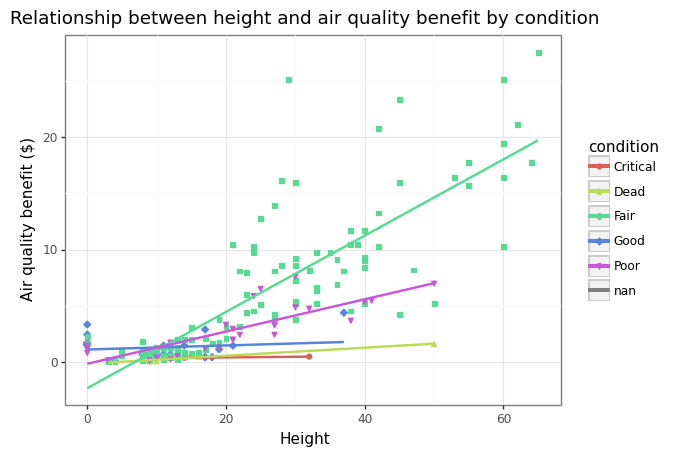

<ggplot: (400409814)>

In [6]:
(ggplot(data = trees.query('neighborhood == "South Oakland"'),
    mapping = aes(x = "height", y = "air_quality_benfits_total_dollar_value", color = "condition")) +
 geom_point(mapping = aes(shape = "condition")) +
 geom_smooth(method = "lm", se = False) +
 ggtitle("Relationship between height and air quality benefit by condition") +
 xlab("Height") +
 ylab("Air quality benefit ($)") +
 theme_bw())

In [ ]:
# write your code here



### Figure 2



/opt/anaconda3/lib/python3.9/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 4157 rows containing missing values.


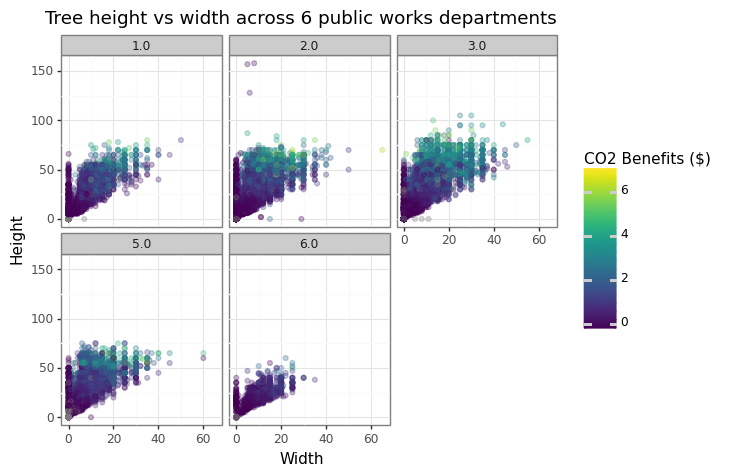

<ggplot: (400327970)>

In [7]:
(ggplot(data = trees.query("public_works_division.notna()"),
       mapping = aes(x = "width", y = "height", color = "co2_benefits_dollar_value")) +
  geom_point(alpha=0.3) + 
  facet_wrap("public_works_division") + 
  scale_color_continuous(name="CO2 Benefits ($)") + 
  theme_bw() + 
  ggtitle("Tree height vs width across 6 public works departments") + 
  xlab("Width") + 
  ylab("Height"))

In [ ]:
# write your code here



### Figure 3



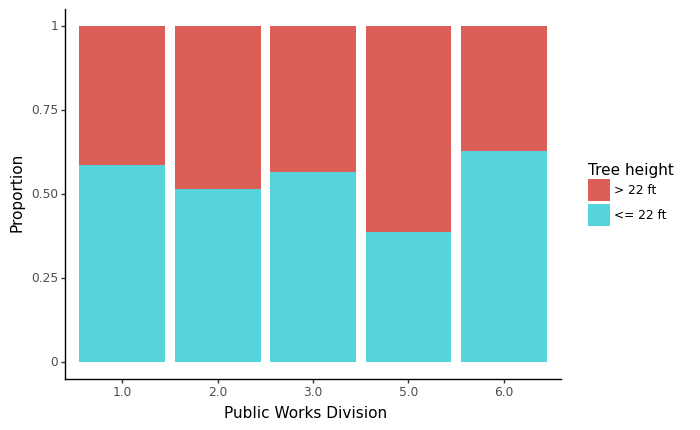

<ggplot: (671558885)>

In [8]:
(ggplot(data = trees.query("height.notna() and public_works_division.notna()"),
       mapping = aes(x = "factor(public_works_division)", fill = "height < 22")) +
  geom_bar(position = "fill") + 
  scale_fill_discrete(name = "Tree height", 
                    labels = ["> 22 ft", "<= 22 ft"]) + 
  ylab("Proportion") + 
  xlab("Public Works Division") + 
  theme_classic())

In [ ]:
# write your code here

